In [20]:
import numpy as np
import tqdm.notebook as tqdm
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def reg_log(x, epsilon: float = 1e-5):
    """Compute a regularised log."""
    return np.log(x + epsilon)

# Linear regression

Distribution = Normal, Link function = id.

In [179]:
def eta(x, beta):
    """Linear predictors.
    
    x: (n_samples, n_features)
    beta: (n_features, )
    
    return: (n_samples, )
    
    """
    return x @ beta.T
    

def link(mu):
    """Link function."""
    return mu  # Canonical


def inverse_link(eta):  # = mu
    return eta


def minus_log_liklihood(y, mu):
    """Compute the log loss.

    y_true: (n_samples, )
    y_pred: (n_samples, )
    """
    sigma2 = 1
    alpha = sigma2
    theta = mu
    # b = (theta * theta) / 2
    # c = - (y * y) / (2 * sigma2)
    # ll = (y * theta - b) / alpha + c
    r = (y - mu)
    ll = -(r * r).sum() / len(r)
    return -ll


def dldbeta(y, x, beta):
    dbdtheta = mu = inverse_link(eta(x, beta))
    alpha = 1
    grad = x.T @ (dbdtheta - y)
    return 2 * grad / len(y)

  0%|          | 0/1500 [00:00<?, ?it/s]

[63.3174265]


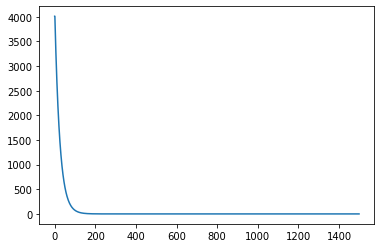

In [180]:
def gradient_descent_step(y, x, beta, learning_rate=0.01):
    """Apply a gradient descent step."""
    new_beta = beta - learning_rate * dldbeta(y, x, beta)
    mu = inverse_link(eta(x, beta))
    loss = minus_log_liklihood(y, mu)
    
    return new_beta, loss


def run_gradient_descent(
    y, x, beta, learning_rate=0.01, n_steps=1000000
):
    """Run the gradient descent loop."""
    mu_init = inverse_link(eta(x, beta))
    loss_init = minus_log_liklihood(y, mu_init)
    loss_dict = {-1: loss_init}
    
    for i in tqdm.tqdm(range(n_steps)):
        beta, loss = gradient_descent_step(y, x, beta, learning_rate=learning_rate)
        loss_dict[i] = loss
        
    return beta, loss_dict


x, y = make_regression(n_samples=500, random_state=42, n_features=1, n_informative=1)
x = StandardScaler().fit_transform(x)

beta = np.zeros(x.shape[-1])


final_beta, loss_dict = run_gradient_descent(y, x, beta, n_steps=1500)
beta = final_beta
print(final_beta)

plt.plot(loss_dict.keys(), loss_dict.values())
plt.show()
plt.close()

mu = inverse_link(eta(x, beta))

In [181]:
def RSS(*, y_true, y_pred):
    residual = y_pred - y_true
    return np.dot(residual, residual)


def TSS(*, y_true):
    x = y_true - np.mean(y_true)
    return np.dot(x, x)


def R2(*, y_true, y_pred):
    return 1 - (RSS(y_true=y_true, y_pred=y_pred) / TSS(y_true=y_true))


R2(y_pred=mu, y_true=y)

0.9999513408240027

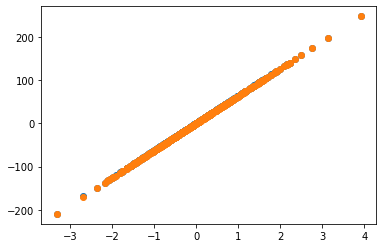

In [184]:
plt.scatter(x, y)
plt.scatter(x, mu)

# Logistic Regression

In [235]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


def reg_log(x, epsilon: float = 1e-5):
    """Compute a regularised log."""
    return np.log(x + epsilon)


def logit(p):
    return reg_log(p) -  reg_log(1 - p)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def eta(x, beta):
    """Linear predictors.
    
    x: (n_samples, n_features)
    beta: (n_features, )
    
    return: (n_samples, )
    
    """
    return x @ beta.T
    

def link(mu):
    """Link function."""
    return logit(mu)  # Canonical


def inverse_link(eta):  # = mu
    return sigmoid(eta)


def minus_log_liklihood(y, mu):
    """Compute the log loss.

    y_true: (n_samples, )
    y_pred: (n_samples, )
    """
    alpha = 1
    theta = logit(mu)
    b = reg_log(1 + np.exp(theta))
    c = 0
    ll = (y * theta - b) / alpha + c
    ll = ll.sum()
    return -ll


def dldbeta(y, x, beta):
    dbdtheta = mu = inverse_link(eta(x, beta))
    alpha = 1
    grad = (1 / alpha) * x.T @ (dbdtheta - y)
    return grad / len(y)
    

assert 1.35 < minus_log_liklihood(np.array([1, 0]), np.array([0.5, 0.5])) < 1.4
assert 0 <= minus_log_liklihood(np.array([1, 0]), np.array([1, 0]))
assert minus_log_liklihood(np.array([1, 0]), np.array([0, 1])) > 20

  0%|          | 0/1500 [00:00<?, ?it/s]

[2.27379179]


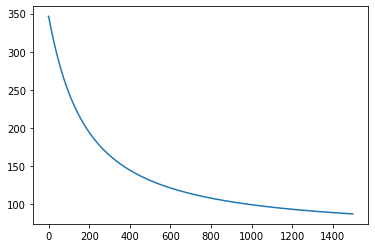

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       247
           1       0.93      0.98      0.96       253

    accuracy                           0.95       500
   macro avg       0.96      0.95      0.95       500
weighted avg       0.96      0.95      0.95       500



In [236]:
def gradient_descent_step(y, x, beta, learning_rate=0.01):
    """Apply a gradient descent step."""
    new_beta = beta - learning_rate * dldbeta(y, x, beta)
    mu = inverse_link(eta(x, beta))
    loss = minus_log_liklihood(y, mu)
    
    return new_beta, loss


def run_gradient_descent(
    y, x, beta, learning_rate=0.01, n_steps=1000000
):
    """Run the gradient descent loop."""
    mu_init = inverse_link(eta(x, beta))
    loss_init = minus_log_liklihood(y, mu_init)
    loss_dict = {-1: loss_init}
    
    for i in tqdm.tqdm(range(n_steps)):
        beta, loss = gradient_descent_step(y, x, beta, learning_rate=learning_rate)
        loss_dict[i] = loss
        
    return beta, loss_dict


x, y = make_classification(
    n_samples=500,
    n_features=1,
    n_redundant=0,
    n_informative=1,
    n_clusters_per_class=1,
    random_state=14
)

beta = np.zeros(x.shape[-1])


final_beta, loss_dict = run_gradient_descent(y, x, beta, n_steps=1500)
beta = final_beta
print(final_beta)

plt.plot(loss_dict.keys(), loss_dict.values())
plt.show()
plt.close()

mu = inverse_link(eta(x, beta))
y_pred = (mu > 0.5).astype(int)

print(classification_report(y_true=y, y_pred=y_pred))

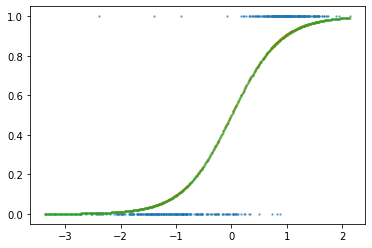

In [237]:
plt.scatter(x, y, label='x vs labels', alpha=0.5, s=2)
plt.scatter(x, mu, label='x vs preds', alpha=0.5, s=2)
q = np.arange(start=x.min(), stop=x.max(), step=0.01)
plt.scatter(q, inverse_link(beta * q), alpha=0.5, s=2)
plt.show()
plt.close()

Here we can see the interplay of the link function and distribution.

The distribution is choosing the errors in the ys, while the inverse_link is the mean of said dist.

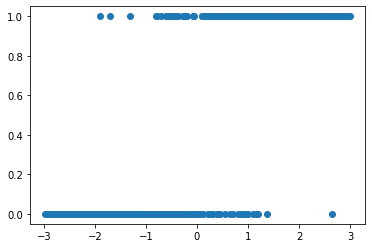

In [238]:
n_samples = 500
rng = np.random.RandomState(0)
x = np.array([rng.uniform(low=-3, high=3) for _ in range(n_samples)])
p = mu = inverse_link  # in this case
y = np.array([rng.binomial(1, p(final_beta * i)) for i in x])
plt.scatter(x, y)

# Poission

In [239]:
from scipy.special import factorial

def eta(x, beta):
    """Linear predictors.
    
    x: (n_samples, n_features)
    beta: (n_features, )
    
    return: (n_samples, )
    
    """
    return x @ beta.T
    

def link(mu):
    """Link function."""
    return reg_log(mu)


def inverse_link(eta):  # = mu
    return np.exp(eta)


def minus_log_liklihood(y, mu):
    """Compute the log loss.

    y_true: (n_samples, )
    y_pred: (n_samples, )
    """
    alpha = 1
    theta = reg_log(mu)
    b = mu
    c = 0  # -reg_log(factorial(y))
    ll = (y * theta - b) / alpha + c
    ll = ll.sum()
    return -ll


def dldbeta(y, x, beta):
    dbdtheta = mu = inverse_link(eta(x, beta))
    alpha = 1
    grad = (1 / alpha) * x.T @ (dbdtheta - y)
    return grad / len(y)

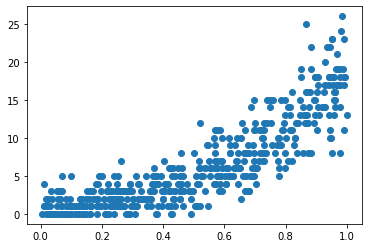

In [240]:
n_samples = 500
beta_to_find = 3
rng = np.random.RandomState(0)
x = np.array([rng.uniform(low=0, high=1) for _ in range(n_samples)])
lam = mu = inverse_link  # in this case
y = np.array([rng.poisson(lam(beta_to_find * i)) for i in x])

plt.scatter(x, y)
plt.show()
plt.close()

x = x.reshape(-1, 1)

  0%|          | 0/1500 [00:00<?, ?it/s]

[2.98282361]


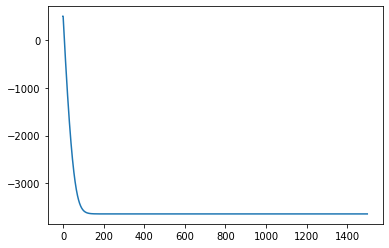

In [241]:
def gradient_descent_step(y, x, beta, learning_rate=0.01):
    """Apply a gradient descent step."""
    new_beta = beta - learning_rate * dldbeta(y, x, beta)
    mu = inverse_link(eta(x, beta))
    loss = minus_log_liklihood(y, mu)
    
    return new_beta, loss


def run_gradient_descent(
    y, x, beta, learning_rate=0.01, n_steps=1000000
):
    """Run the gradient descent loop."""
    mu_init = inverse_link(eta(x, beta))
    loss_init = minus_log_liklihood(y, mu_init)
    loss_dict = {-1: loss_init}
    
    for i in tqdm.tqdm(range(n_steps)):
        beta, loss = gradient_descent_step(y, x, beta, learning_rate=learning_rate)
        loss_dict[i] = loss
        
    return beta, loss_dict


beta = np.zeros(x.shape[-1])


final_beta, loss_dict = run_gradient_descent(y, x, beta, n_steps=1500)
beta = final_beta
print(final_beta)

plt.plot(loss_dict.keys(), loss_dict.values())
plt.show()
plt.close()

mu = inverse_link(eta(x, beta))
y_pred = (mu > 0.5).astype(int)

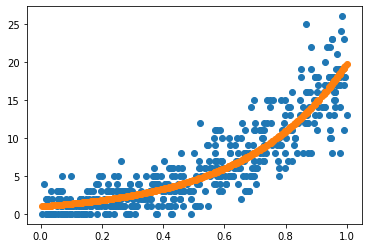

In [242]:
plt.scatter(x, y)
plt.scatter(x, mu)